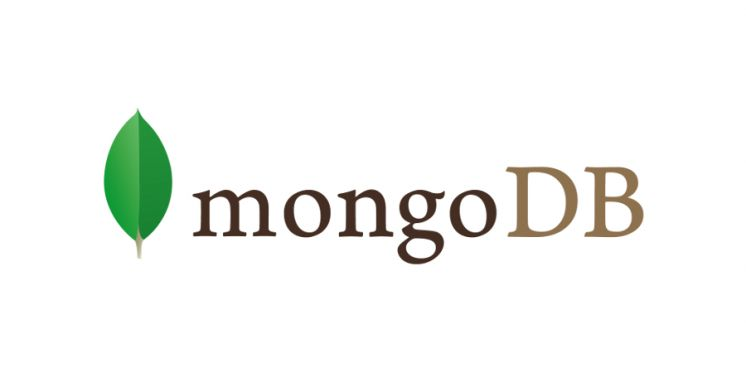

In [ ]:
# Após instalação do mongoDB, vamos instalar o driver de python para acessar o MongoDB via python.

In [ ]:
!pip install pymongo

In [ ]:
#Importando pymongo. A biblioteca pymongo permite interação com banco de dados MongoDB via python.
import pymongo

#Criando um MongoClient, que representa a conexão com um servidor do MongoDB.
client = pymongo.MongoClient()

In [ ]:
#Criando nosso primeiro banco de dados não-relacional:
primeiro_db = client["primeiro_db"]

In [ ]:
client.list_database_names()

Aonde está nosso banco? Ele não aparecerá aqui enquanto nós não adicionarmos dados nele. Lembram que aqui no não relacional temos coleções? 

In [ ]:
#criando a primeira coleção:

minha_colecao = primeiro_db["cadastro_clientes"]
type(minha_colecao)

In [ ]:
#Adicionando 3 documentos a nossa coleção.

#Documentos são escritos em dicionários ou arquivos json's. Veja que os campos nos documentos podem ser diferentes!

cliente1 = {"nome": "Maria", "Idade": 40, "Cidade": "São Paulo", "email": "maria@gmail.com"}
cliente2 = {"nome": "João", "Idade": 20, "Cidade": "São Paulo", "email": "joao@gmail.com"}
cliente3 = {"nome": "Paulo", "Idade": 56}

In [ ]:
# A função insert_many adiciona vários documentos de uma só vez na coleção:
minha_colecao.insert_many([cliente1,cliente2,cliente3])

In [14]:
# Agora que já temos documentos inseridos na coleção, o banco de dados aparecerá na lista dos bancos do MongoDB

client.list_database_names()

['admin', 'config', 'local', 'primeiro_db']

In [15]:
#Verificando quais coleções temos:

primeiro_db.list_collection_names()

['cadastro_clientes']

**COUNT**: Retorna a quantidade de documentos em uma coleção

In [16]:
minha_colecao.count_documents({})

3

**DISTINCT**: Retorna uma lista de valores distintos entre todos os documentos, relativos a uma determinada chave.

In [17]:
minha_colecao.distinct('nome')

['João', 'Maria', 'Paulo']

In [18]:
minha_colecao.distinct('email')

['joao@gmail.com', 'maria@gmail.com']

**FIND**:

In [19]:
# A função find é a função utilizada para fazer queries no banco de dados, assim como usamos a execute para o SQlite:

for doc in minha_colecao.find():
    print(doc)

{'_id': ObjectId('5f959101dea48bc1dae859a7'), 'nome': 'Maria', 'Idade': 40, 'Cidade': 'São Paulo', 'email': 'maria@gmail.com'}
{'_id': ObjectId('5f959101dea48bc1dae859a8'), 'nome': 'João', 'Idade': 20, 'Cidade': 'São Paulo', 'email': 'joao@gmail.com'}
{'_id': ObjectId('5f959101dea48bc1dae859a9'), 'nome': 'Paulo', 'Idade': 56}


In [20]:
#filtrando documentos, onde idade é maior igual a 30 anos:

for doc in minha_colecao.find({"Idade":{"$gte": 30}}):
    print(doc)

{'_id': ObjectId('5f959101dea48bc1dae859a7'), 'nome': 'Maria', 'Idade': 40, 'Cidade': 'São Paulo', 'email': 'maria@gmail.com'}
{'_id': ObjectId('5f959101dea48bc1dae859a9'), 'nome': 'Paulo', 'Idade': 56}


In [21]:
for doc in minha_colecao.find({"Cidade":"São Paulo"}):
    print(doc)

{'_id': ObjectId('5f959101dea48bc1dae859a7'), 'nome': 'Maria', 'Idade': 40, 'Cidade': 'São Paulo', 'email': 'maria@gmail.com'}
{'_id': ObjectId('5f959101dea48bc1dae859a8'), 'nome': 'João', 'Idade': 20, 'Cidade': 'São Paulo', 'email': 'joao@gmail.com'}


In [22]:
#Podemos filtrar apenas os campos que queremos ver:
#Usamos 1 para os campos que queremos ver e 0 para os campos que não queremos (projeção)

for doc in minha_colecao.find({"Cidade":"São Paulo"},{"_id":0, "nome":1, "email":1}):
    print(doc)

{'nome': 'Maria', 'email': 'maria@gmail.com'}
{'nome': 'João', 'email': 'joao@gmail.com'}


In [23]:
#Não podemos fazer isso, ou colocamos campos que não queremos ver, ou colocamos campos que queremos ver. Só podemos
#fazer com id.

for doc in minha_colecao.find({"Cidade":"São Paulo"},{"nome":1, "email":0}):
    print(doc)

OperationFailure: Cannot do exclusion on field email in inclusion projection, full error: {'ok': 0.0, 'errmsg': 'Cannot do exclusion on field email in inclusion projection', 'code': 31254, 'codeName': 'Location31254'}

In [24]:
#O que se pode fazer é o seguinte: Quero ver todos os campos com exceção de e-mail.
for doc in minha_colecao.find({"Cidade":"São Paulo"},{"email":0}):
    print(doc)

{'_id': ObjectId('5f959101dea48bc1dae859a7'), 'nome': 'Maria', 'Idade': 40, 'Cidade': 'São Paulo'}
{'_id': ObjectId('5f959101dea48bc1dae859a8'), 'nome': 'João', 'Idade': 20, 'Cidade': 'São Paulo'}


In [25]:
#Ou ainda, quero ver só o campo e-mail:
#O _id é o único que funciona de maneira diferente, que você tem mais controle
for doc in minha_colecao.find({"Cidade":"São Paulo"},{"email":1}):
    print(doc)

{'_id': ObjectId('5f959101dea48bc1dae859a7'), 'email': 'maria@gmail.com'}
{'_id': ObjectId('5f959101dea48bc1dae859a8'), 'email': 'joao@gmail.com'}
